In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth, files
from oauth2client.client import GoogleCredentials
import chardet
import os
import io
import pandas as pd
from lxml import html
from lxml import etree
from IPython.display import display, HTML
import numpy as np

In [3]:
!pip install -U -q PyDrive
!pip install -U -q lxml
!pip install chardet

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth, files
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
uploaded = files.upload()

Saving D_MEGA.HTM to D_MEGA.HTM


In [0]:
# display(HTML(uploaded['D_MEGA.HTM'].decode(chardet.detect(uploaded['D_MEGA.HTM'])['encoding'])))

In [0]:
# root = html.fromstring(uploaded['D_MEGA.HTM'].decode(chardet.detect(uploaded['D_MEGA.HTM'])['encoding']))

In [0]:
dforiginal = pd.read_html(uploaded['D_MEGA.HTM'].decode(chardet.detect(uploaded['D_MEGA.HTM'])['encoding']),index_col=False, header=0)[0]

In [0]:
rename_columns = {
    'Data Sorteio': 'dtsorteio',
    '1ª Dezena' : 'dezena1',
    '2ª Dezena' : 'dezena2',
    '3ª Dezena' : 'dezena3',
    '4ª Dezena' : 'dezena4',
    '5ª Dezena' : 'dezena5',
    '6ª Dezena' : 'dezena6',
    'Ganhadores_Quina': 'ganhadores_quina',
    'Ganhadores_Quadra':'ganhadores_quadra',
    'Ganhadores_Sena': 'ganhadores_sena',
    'Arrecadacao_Total': 'arrecadacao_total',
    'Acumulado': 'acumulado',
    'Rateio_Quina': 'rateio_quina',
    'Valor_Acumulado' : 'valor_acumulado'}

change_values = {    
    'SIM': 1,
    'NÃO': 0
}
   

df = dforiginal

In [0]:
df = df.rename(columns = rename_columns)
df.acumulado = df.acumulado.map(change_values)

In [0]:
# df = df.fillna(0)

In [0]:
df = df[['dezena1','dezena2','dezena3','dezena4','dezena5','dezena6']]

In [0]:
df.dropna(inplace=True)

In [0]:
df['dezena1'] = df['dezena1'].astype(int)
df['dezena2'] = df['dezena2'].astype(int)
df['dezena3'] = df['dezena3'].astype(int)
df['dezena4'] = df['dezena4'].astype(int)
df['dezena5'] = df['dezena5'].astype(int)
df['dezena6'] = df['dezena6'].astype(int)
df['dezena6'] = df['dezena6'].astype(int)


In [0]:
# df = df.dropna(axis=0, how='all')

In [11]:
df.head()

,dezena1,dezena2,dezena3,dezena4,dezena5,dezena6
0,41,5,4,52,30,33
1,9,39,37,49,43,41
2,36,30,10,11,29,47
4,6,59,42,27,1,5
5,1,19,46,6,16,2


In [12]:
df.columns

Index(['dezena1', 'dezena2', 'dezena3', 'dezena4', 'dezena5', 'dezena6'], dtype='object')

In [15]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2109 entries, 0 to 2325
Data columns (total 6 columns):
dezena1    2109 non-null int64
dezena2    2109 non-null int64
dezena3    2109 non-null int64
dezena4    2109 non-null int64
dezena5    2109 non-null int64
dezena6    2109 non-null int64
dtypes: int64(6)
memory usage: 115.3 KB


In [0]:
# df = df[['dezena1','dezena2','dezena3','dezena4','dezena5','dezena6']]

In [0]:
NUM_DEZENAS = 60

In [17]:
one_hot_encoder = np.zeros(shape=(len(df), NUM_DEZENAS))
np.shape(one_hot_encoder)

(2109, 60)

In [0]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [0]:
dezenas = pd.unique(df[['dezena1','dezena2','dezena3','dezena4','dezena5','dezena6']].values.ravel('K'))

In [20]:
len(dezenas)

60

In [21]:
dezenas_count = df.apply(pd.Series.value_counts).sum(axis=1)
# df['dezena1'].value_counts()
# df['dezena1'].head(16)
dezenas_count.head(10)

1     207
2     216
3     197
4     233
5     240
6     219
7     198
8     212
9     188
10    242
dtype: int64

In [0]:
# dezenas_count = {}
# for dezena in dezenas:
#   print(df.count)

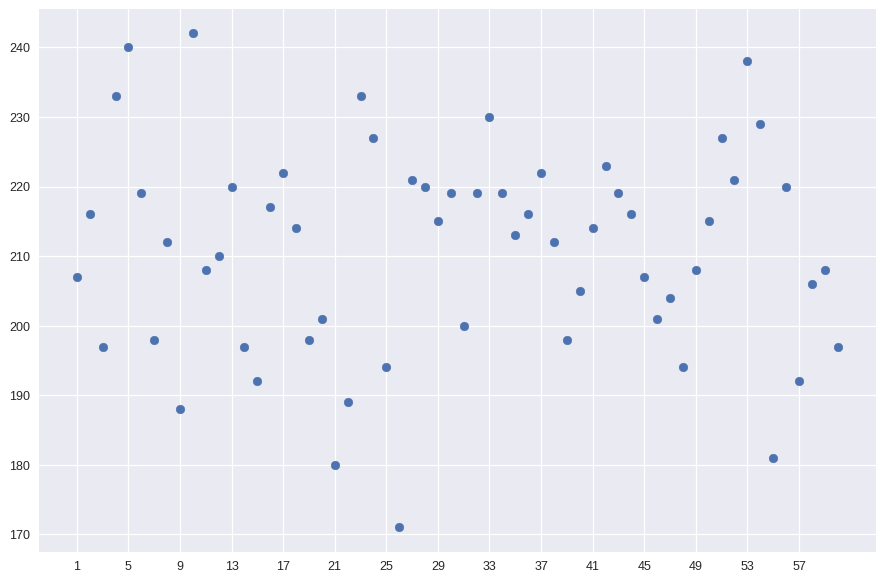

In [22]:
figure(num=None, figsize=(12, 8), dpi=90, facecolor='w', edgecolor='k')
plt.scatter(dezenas_count.index, dezenas_count.values)
# plt.xticks()
plt.grid(axis='y', linestyle='-')
plt.xticks([x for x in range(1, 61, 4)])
plt.show()


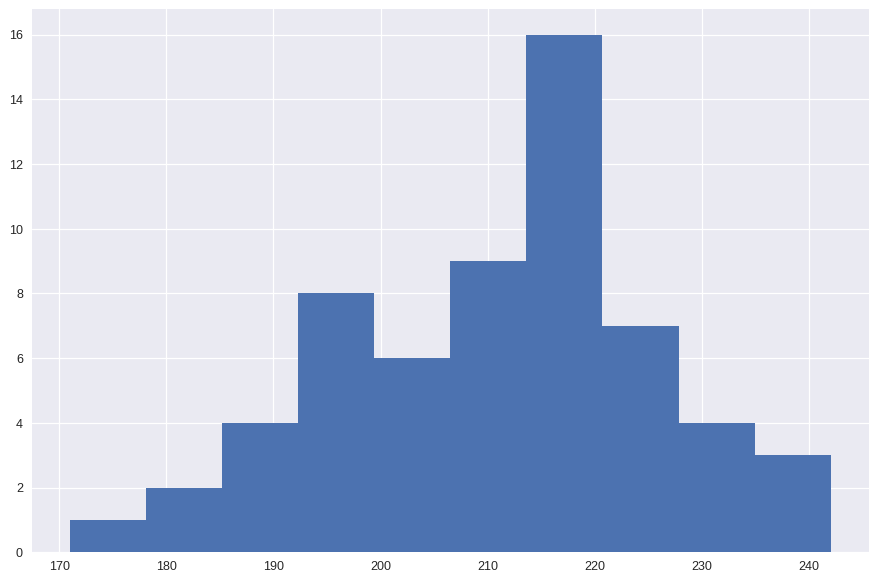

In [0]:
figure(num=None, figsize=(12, 8), dpi=90, facecolor='w', edgecolor='k')
plt.hist(dezenas_count, bins=10)
plt.show()

In [0]:
a = pd.DataFrame(dezenas_count)
# dezenas_count.hist()

In [0]:
# Analisar quantidade de quadrantes e dezenas

* Sempre checar se o individuo gerado já saiu
* Dezena 40 não vai sair no resultado oficial final
* 30% da população vai ter max fitness já na primeira iteração (se a população tiver > ~2000)

In [0]:
'''Assuming population is an array with Individual Objects that have a fitness attribute'''
def total_fitness(population):
  total_fitness = 0
  for individual in population:
      total_fitness = total_fitness + individual.fitness
  return total_fitness

In [0]:
def relative_fitness(population, total_fitness):
  relative_fitness = []
  for x in range(len(list_individuals)):
      relative_fitness.append(list_individuals[x].fitness / total_fitness)
  return relative_fitness

In [0]:
def roulette_probabilities(population):
  total_fitness_in_population = total_fitness(population)
  relative_fitness_by_individual = relative_fitness(population, total_fitness_in_population)

  probabilities_to_survive = [sum(relative_fitness_by_individual[:i+1]) for i in range(len(relative_fitness_by_individual))]
  return probabilities_to_survive

In [0]:
def create_new_population_by_natural_selection(population, probabilities_to_survive, total_amount_to_survive):
  new_population = []
  for _ in range(total_amount_to_survive):
      generated_chance_to_survive = np.random.rand()
      for (i, individual) in enumerate(population):
          if generated_chance_to_survive <= probabilities_to_survive[i]:
              new_population.append(individual)
              break

  return new_population

In [0]:

def selection(population, percentage_that_should_survive):
  probabilities_to_survive = roulette_probabilities(population)
  total_amount_to_survive = len(population) * percentage_that_should_survive
  selected_for_reproduction = create_new_population_by_natural_selection(population, probabilities_to_survive, total_amount_to_survive)
  
  return selected_for_reproduction
  

In [29]:
a = [1,2,3]
np.random.randint(0, len(a))

2

In [0]:
class Individual:
  def __init__(self, solution):
    self.solution = solution
    self.fitness = 0

In [0]:
def crossover(population, reproduction_chance):
  new_population = []

  qtd_cross = len(population) // 2

  for parent1, parent2 in zip(population[:qtd_cross], population[qtd_cross:]):
      random_reproduction_chance = np.random.rand()

      if random_reproduction_chance <= reproduction_chance:
        cut_point = len(parent1.solution) // 2
        solution1 = parent1.solution[:cut_point] + parent2.solution[cut_point:]
        solution2 = parent2.solution[:cut_point] + parent1.solution[cut_point:]
        
        child1 = Individual(solution1)
        child2 = Individual(solution2)
        
        new_population.append(child1)
        new_population.append(child2)

  return newlist_individuals

In [0]:
def mutate(individual):
  random_solution_value = np.random.randint(1, 61)
  mutation_index = np.random.randint(0, len(individual.solution))
  if (random_solution_value in individual.solution or random_solution_value == individual.solution[mutation_index]):
    mutate(individual)
    return
  individual[mutation_index] = random_solution_value

In [0]:
def mutation(population, mutation_rate):
  for individual in population:
    random_mutation_chance = np.random.rand()
    if (random_mutation_chance < mutation_rate):
      mutate(individual)

In [0]:
def checkAndCountDistanceGreaterThanThreshold(distance, threshold):
  d = distance / 2
  if (d > threshold):
    return 1
  return 0

def near_genes(chromosome, threshold):
  hdistance = 0
  vdistance = 0
  addistance = 0
  dddistance = 0
  
  total_distance_greater_than_2 = 0
 
  for i in range(0, len(chromosome)):
      current_gene = chromosome[i]
      for j in range(0, len(chromosome)):
        distance = abs(current_gene - chromosome[j])
        
        if (distance == 1):
          hdistance += 1
          
        if (distance in (10, 20, 30, 40, 50)):
          vdistance += 1
          
        if (distance in (11, 22, 33, 44, 55)):
          addistance += 1
          
        if (distance in (9, 18, 27, 36, 45)):
          dddistance += 1
          
  print('Horizontal distance:', hdistance/2)     
  print('Vertical distance:', vdistance/2)
  print('Ascending diagonal distance:', addistance/2)
  print('Descending diagonal distance:', dddistance/2) 
  
  total_distance_greater_than_2 += checkAndCountDistanceGreaterThanThreshold(hdistance, threshold);
  total_distance_greater_than_2 += checkAndCountDistanceGreaterThanThreshold(vdistance, threshold);
  total_distance_greater_than_2 += checkAndCountDistanceGreaterThanThreshold(addistance, threshold);
  total_distance_greater_than_2 += checkAndCountDistanceGreaterThanThreshold(dddistance, threshold);
          
  return total_distance_greater_than_2

In [0]:
def fitness(chromosome):
  w1 = near_genes(chromosome, 2)
  print('Weight 1 (Neighbor Values):', w1)

In [263]:
fitness([55, 46, 37, 28, 19, 15])

Horizontal distance: 0.0
Vertical distance: 1.0
Ascending diagonal distance: 1.0
Descending diagonal distance: 10.0
Weight 1 (Neighbor Values): 1
